# The Income Census Analysis

In [35]:
# Import the data
import pandas as pd
df = pd.read_csv("C:/Users/njoro/Desktop/PYTHON/train.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [37]:
df.shape

(43957, 15)

In [38]:
df.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [39]:
# Drop missing rows
df = df.dropna(axis = 0)


In [41]:
# Drop educational-num 
del df['educational-num']

In [42]:
# Check if there is any missing
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income_>50K       0
dtype: int64

In [109]:
# Now the data is cleaning
# We begin by descriptive statistics
df.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income_>50K
count,40727.000000,4.072700e+04,40727.000000,40727.000000,40727.000000,40727.000000
mean,38.521251,1.897859e+05,1118.639944,89.243450,40.908464,0.247796
std,13.243211,1.059021e+05,7639.841297,406.568894,12.014493,0.431738
min,17.000000,1.349200e+04,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.173630e+05,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.782820e+05,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.381530e+05,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000,1.000000


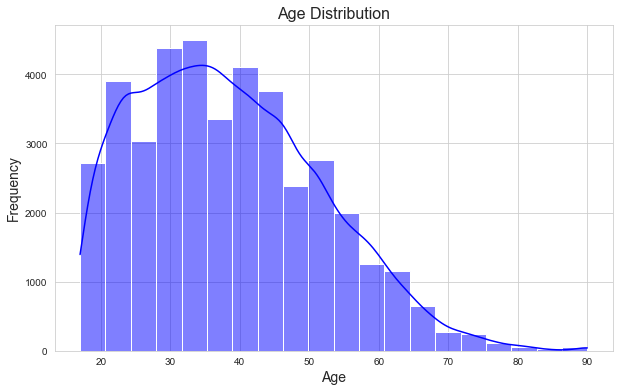

In [27]:
# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the histogram plot
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=20, kde=True, color='blue')

# Customize the plot with titles and labels
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

   #### From the distribution we see that majority of the people are aged 30 to 35

Text(0.5, 1.0, 'Income Distribution')

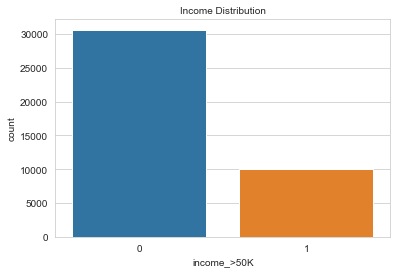

In [29]:
# Now lets see how many people earn above 50k
sns.countplot(data = df, x = 'income_>50K')
plt.title('Income Distribution', fontsize = 10)


#### Most of the individuals do not earn above 50k

## Now let us test different interesting hypothesis

### Hypothesis 1: People who are older earn more

Text(0.5, 0, 'Age')

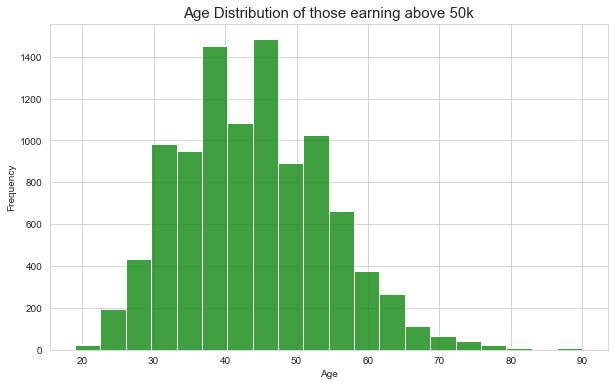

In [61]:
# Now first let us plot age distribution of those who earn above 50k
# Create the data first 
df_above = df[df['income_>50K'] == 1]

plt.figure(figsize = (10, 6))
plt.title('Age Distribution of those earning above 50k', fontsize = 15)
sns.histplot(data = df_above, x = 'age', bins = 20, color = 'green')
plt.ylabel('Frequency')
plt.xlabel('Age')

Text(0.5, 0, 'Age')

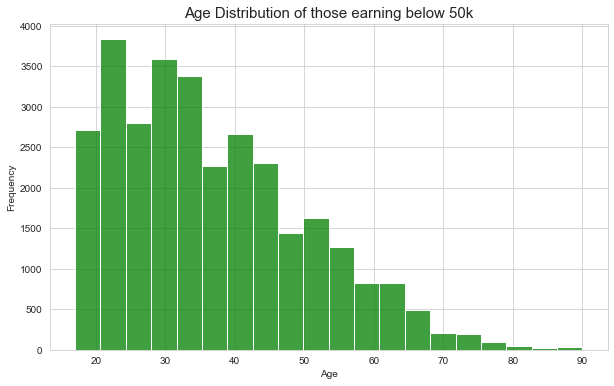

In [60]:
# Now secondly let us plot age distribution of those who earn below 50k
# Create the data first 
df_below = df[df['income_>50K'] == 0]

plt.figure(figsize = (10, 6))
plt.title('Age Distribution of those earning below 50k', fontsize = 15)
sns.histplot(data = df_below, x = 'age', bins = 20, color = 'green')
plt.ylabel('Frequency')
plt.xlabel('Age')

### From the plots above we can see that majority of the people earning above 50k are aged between late 30s and their early 50s also people who earn below 50k are primarily aged between 20 and 30

## Hypothesis 2: Income bias based on working class

In [71]:
dist_data = pd.concat([df[df['income_>50K'] == 1].groupby('workclass').workclass.count(),
                         df[df['income_>50K'] == 0].groupby('workclass').workclass.count()], axis = 1)



In [74]:
dist_data.columns = ['Earning_Above_50k', 'Earning_Below_50k']

In [84]:
dist_data_final = (dist_data.Earning_Above_50k / (dist_data.Earning_Above_50k + dist_data.Earning_Below_50k)) * 100

Text(0, 0.5, 'Percentage of People')

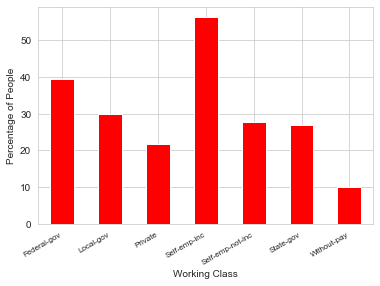

In [94]:

ax = dist_data_final.plot(kind = 'bar', color = 'r', 
 y='Percentage')
ax.set_xticklabels(dist_data_final.index, rotation=30, 
 fontsize=8, ha='right')
ax.set_xlabel('Working Class')
ax.set_ylabel('Percentage of People')

### We see that people who are self-employed and have a company have got the maximum share of people who earn more than 50K. The second most well-off group in terms of earning are federal government employees.

## Hypothesis 3: People with more education earn more

In [97]:
dist_edu = pd.concat([df[df['income_>50K'] == 1].groupby('education').education.count(),
                     df[df['income_>50K'] == 0].groupby('education').education.count()], axis = 1)


In [98]:
dist_edu.columns = ['Earning_Above_50k', 'Earning_Below_50k']

In [104]:
dist_edu_final = (dist_edu['Earning_Above_50k'] / (dist_edu['Earning_Above_50k'] + dist_edu['Earning_Below_50k'])) * 100

Text(0, 0.5, 'Percentage')

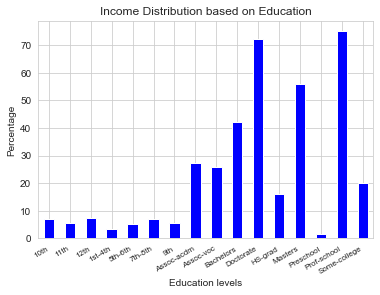

In [108]:
ax = dist_edu_final.plot(kind = 'bar' , color = 'blue', y = 'Percentage')
ax.set_xticklabels(dist_edu_final.index, 
                  rotation = 30,
                  fontsize = 8,
                  ha = 'right')
ax.set_title('Income Distribution based on Education')
ax.set_xlabel('Education levels')
ax.set_ylabel('Percentage')

### Those from prof-school earn the best followed by doctorate

## Now let us create a meachine learning model to predict if someone would earn above 50k or not

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40727 entries, 0 to 43956
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             40727 non-null  int64 
 1   workclass       40727 non-null  object
 2   fnlwgt          40727 non-null  int64 
 3   education       40727 non-null  object
 4   marital-status  40727 non-null  object
 5   occupation      40727 non-null  object
 6   relationship    40727 non-null  object
 7   race            40727 non-null  object
 8   gender          40727 non-null  object
 9   capital-gain    40727 non-null  int64 
 10  capital-loss    40727 non-null  int64 
 11  hours-per-week  40727 non-null  int64 
 12  native-country  40727 non-null  object
 13  income_>50K     40727 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 4.7+ MB


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Define the feature columns and target variable
feature_columns = ['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
                   'occupation', 'relationship', 'race', 'gender', 'capital-gain',
                   'capital-loss', 'hours-per-week', 'native-country']
target_column = 'income_>50K'

X = df[feature_columns]
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# OneHotEncode categorical variables
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
numerical_features = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


In [112]:
from sklearn.linear_model import LogisticRegression

# Create a pipeline
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train the model
logistic_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_pipeline.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))


Logistic Regression Accuracy: 0.7922906948195433
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      6135
           1       0.73      0.25      0.37      2011

    accuracy                           0.79      8146
   macro avg       0.76      0.61      0.62      8146
weighted avg       0.78      0.79      0.75      8146



In [113]:
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
rf_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8424993862018169
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6135
           1       0.72      0.60      0.65      2011

    accuracy                           0.84      8146
   macro avg       0.80      0.76      0.78      8146
weighted avg       0.84      0.84      0.84      8146



In [114]:
from xgboost import XGBClassifier

# Create a pipeline
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# Train the model
xgb_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_pipeline.predict(X_test)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


ModuleNotFoundError: No module named 'xgboost'

In [115]:
pip install xgboost